In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Data generating processes

The data will come from either of two types of sources. 

1. Linear combination of sines and cosines
2. Linear combination of Legendre polynomials

defined on the interal $t \in [-\frac 1 2, +\frac 1 2]$

## Family 1: Sines and Cosines (Fourier Series)

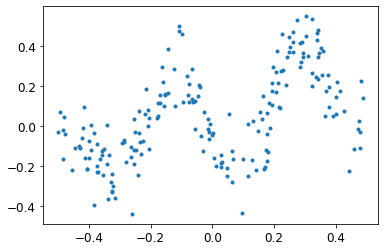

In [2]:
# produce training data
sigma = 0.1
n = 200
np.random.seed(3)
t = np.random.rand(n) - 0.5
noise = sigma * np.random.randn(n)

t = np.random.rand(n) - 0.5

def features(t, p, n):
    return np.stack(
        [np.cos(f * 2*np.pi*t) for f in range(0, (p+1)//2)] +
        [np.sin(f * 2*np.pi*t) for f in range(1, (p+2)//2)])

p = 6   # number of features
X = features(t, p, n)  
theta = 0.1*np.random.randn(p)
y = theta @ X + noise   # training data 

plt.plot(t, y, '.')

In [3]:
t = np.round(t, 2)
y = np.round(y, 2)

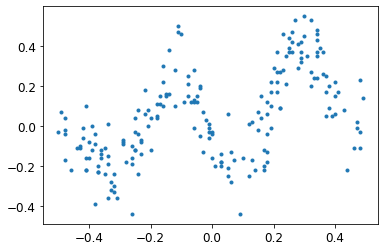

In [4]:
plt.plot(t, y, '.')

## Family 2: Legendre Polynomials

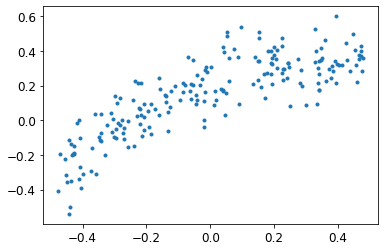

In [5]:
from scipy.special import legendre

# produce training data

sigma = 0.1
n = 200
np.random.seed(3)
t = np.random.rand(n) - 0.5
noise = sigma * np.random.randn(n)

def features(t, p, n):
    return np.stack(
        [legendre(d)(t) for d in range(p)])

p = 6  # number of features
X = features(t, p, n)
theta = 0.4*np.random.randn(p)
y = theta @ X + noise   # training data 

plt.plot(t, y, '.')

# Assignment 

Due Oct 29

Given some points $(t, y)$, find the model that will predict $y$ from $t$ for new data sampled from the same process. Assume Gaussian noise. Assume that the data are 

The data come from one of the models above but the degree `p` is unknown. 

In [6]:
t = np.array([-0.49,  0.48, -0.19,  0.24, -0.08,  0.49, -0.21, -0.16, -0.13,
        0.5 ,  0.09,  0.14, -0.27,  0.01,  0.37, -0.42, -0.45, -0.14,
        0.17,  0.14, -0.38,  0.18, -0.45, -0.3 , -0.12,  0.02, -0.11,
        0.38, -0.01,  0.12,  0.44,  0.32,  0.2 , -0.26,  0.04,  0.23,
        0.18,  0.14,  0.15, -0.21, -0.41,  0.06, -0.25, -0.31, -0.42,
       -0.09,  0.34, -0.05,  0.21,  0.26,  0.27,  0.27, -0.28, -0.49,
        0.01,  0.29, -0.15,  0.34,  0.49,  0.03, -0.12,  0.15, -0.02,
       -0.02,  0.24,  0.47, -0.06,  0.34, -0.29, -0.43, -0.09,  0.14,
        0.23,  0.23,  0.08,  0.12, -0.42, -0.12, -0.19,  0.45, -0.36,
       -0.08,  0.13, -0.16,  0.23,  0.44,  0.5 , -0.3 ,  0.45, -0.24,
       -0.42,  0.28,  0.11, -0.47,  0.11, -0.27,  0.41,  0.46, -0.36,
       -0.32, -0.05,  0.45, -0.08, -0.39, -0.34, -0.37,  0.32, -0.24,
       -0.44, -0.03, -0.4 ,  0.47,  0.27, -0.32, -0.2 , -0.37, -0.13,
       -0.07,  0.08, -0.44, -0.44,  0.43, -0.04,  0.09,  0.35, -0.02,
       -0.12,  0.42, -0.39, -0.25, -0.45,  0.44, -0.02,  0.31, -0.48,
        0.23, -0.07, -0.17,  0.4 ,  0.35, -0.2 ,  0.45, -0.1 ,  0.17,
        0.21, -0.11, -0.3 ,  0.48,  0.31,  0.21,  0.2 ,  0.27,  0.47,
       -0.39,  0.46,  0.31,  0.23,  0.5 , -0.43,  0.13, -0.34,  0.02,
       -0.27,  0.3 , -0.18,  0.41,  0.17, -0.15,  0.29, -0.05, -0.39,
        0.25,  0.28,  0.02, -0.21,  0.11,  0.16,  0.47,  0.1 ,  0.03,
        0.22,  0.43,  0.16, -0.21, -0.16,  0.39,  0.25,  0.04, -0.4 ,
        0.22,  0.46,  0.12,  0.15,  0.48, -0.48, -0.15, -0.42,  0.28,
       -0.36,  0.31])


In [7]:
y = np.array([-0.06, -0.09, -0.19,  0.  , -0.03, -0.18, -0.12, -0.31, -0.17,
       -0.18,  0.09,  0.16, -0.28,  0.15, -0.04,  0.04,  0.06, -0.28,
        0.18,  0.11,  0.27,  0.34,  0.11, -0.22, -0.18,  0.39, -0.29,
       -0.06,  0.1 ,  0.08, -0.  , -0.02,  0.06, -0.35,  0.16,  0.28,
       -0.03,  0.17,  0.37, -0.15,  0.19,  0.21, -0.29, -0.33,  0.08,
       -0.24,  0.06,  0.02,  0.26,  0.07,  0.1 ,  0.09, -0.52,  0.03,
        0.3 ,  0.1 , -0.15, -0.26, -0.26,  0.1 , -0.27,  0.11,  0.02,
        0.1 ,  0.09, -0.23, -0.03, -0.21, -0.4 , -0.04, -0.17,  0.07,
        0.08,  0.15,  0.27,  0.41,  0.07, -0.31, -0.29, -0.3 ,  0.06,
       -0.1 ,  0.08, -0.29,  0.07, -0.2 ,  0.06, -0.25, -0.13, -0.34,
        0.05,  0.21,  0.07,  0.13,  0.32, -0.26, -0.01, -0.17, -0.31,
       -0.21,  0.11, -0.1 , -0.01,  0.16, -0.01,  0.1 , -0.1 , -0.28,
        0.08, -0.09,  0.04, -0.07, -0.11, -0.35, -0.23,  0.05, -0.25,
       -0.12,  0.15,  0.01,  0.17,  0.02, -0.01,  0.04, -0.21,  0.03,
       -0.15,  0.08,  0.08, -0.38,  0.19, -0.18,  0.13, -0.03,  0.1 ,
        0.1 , -0.05, -0.29, -0.36,  0.12, -0.42, -0.32, -0.  ,  0.22,
        0.  , -0.36, -0.33,  0.06, -0.04,  0.18, -0.08, -0.22, -0.25,
        0.09, -0.03, -0.17,  0.02, -0.09,  0.13,  0.24, -0.04,  0.15,
       -0.44, -0.02, -0.24,  0.09,  0.17, -0.35, -0.15, -0.1 ,  0.08,
        0.  ,  0.09,  0.22, -0.38,  0.06,  0.14, -0.26,  0.19,  0.41,
        0.13, -0.13,  0.3 , -0.15, -0.02, -0.09, -0.07,  0.31,  0.04,
       -0.02, -0.05,  0.07,  0.16, -0.21,  0.01, -0.2 , -0.09,  0.11,
        0.08, -0.  ])

Text(0, 0.5, 'y')

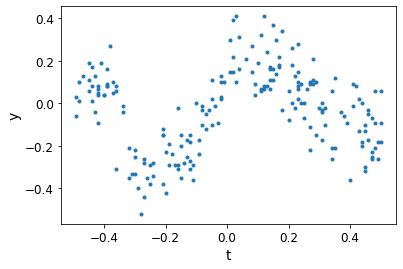

In [8]:
plt.plot(t, y, '.')
plt.xlabel('t')
plt.ylabel('y')

### Steps
1. Select performance measure (cost function):  Use MSE.
2. Implement linear regression for the two models: Assume known model and number of features p, find the parameters theta.
3. Visualize the fit and print the training cost function.
4. Fit with a different model and a different p.
5. Use 10-fold cross-validation to compare models.  Measure average cross-validated MSE.  Output: best model and best `p`.
6. (In class or evaluation) use the testing data set to test the perfomance. 

### 1. Select performance measure (cost function):  Use MSE.

In [9]:
X

array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 0.0507979 ,  0.20814782, -0.20909526, ..., -0.43772052,
         0.38424143, -0.05418982],
       [-0.49612936, -0.43501173, -0.43441876, ..., -0.21260112,
        -0.27853778, -0.49559519],
       [-0.07586915, -0.28967645,  0.29078835, ...,  0.44691347,
        -0.43453722,  0.08088691],
       [ 0.36535253,  0.22074163,  0.21940975, ..., -0.18288975,
        -0.08328926,  0.36402571],
       [ 0.09410178,  0.31444556, -0.31521025, ..., -0.2134325 ,
         0.29002404, -0.1002172 ]])

In [10]:
t

array([-0.49,  0.48, -0.19,  0.24, -0.08,  0.49, -0.21, -0.16, -0.13,
        0.5 ,  0.09,  0.14, -0.27,  0.01,  0.37, -0.42, -0.45, -0.14,
        0.17,  0.14, -0.38,  0.18, -0.45, -0.3 , -0.12,  0.02, -0.11,
        0.38, -0.01,  0.12,  0.44,  0.32,  0.2 , -0.26,  0.04,  0.23,
        0.18,  0.14,  0.15, -0.21, -0.41,  0.06, -0.25, -0.31, -0.42,
       -0.09,  0.34, -0.05,  0.21,  0.26,  0.27,  0.27, -0.28, -0.49,
        0.01,  0.29, -0.15,  0.34,  0.49,  0.03, -0.12,  0.15, -0.02,
       -0.02,  0.24,  0.47, -0.06,  0.34, -0.29, -0.43, -0.09,  0.14,
        0.23,  0.23,  0.08,  0.12, -0.42, -0.12, -0.19,  0.45, -0.36,
       -0.08,  0.13, -0.16,  0.23,  0.44,  0.5 , -0.3 ,  0.45, -0.24,
       -0.42,  0.28,  0.11, -0.47,  0.11, -0.27,  0.41,  0.46, -0.36,
       -0.32, -0.05,  0.45, -0.08, -0.39, -0.34, -0.37,  0.32, -0.24,
       -0.44, -0.03, -0.4 ,  0.47,  0.27, -0.32, -0.2 , -0.37, -0.13,
       -0.07,  0.08, -0.44, -0.44,  0.43, -0.04,  0.09,  0.35, -0.02,
       -0.12,  0.42,

In [11]:
y

array([-0.06, -0.09, -0.19,  0.  , -0.03, -0.18, -0.12, -0.31, -0.17,
       -0.18,  0.09,  0.16, -0.28,  0.15, -0.04,  0.04,  0.06, -0.28,
        0.18,  0.11,  0.27,  0.34,  0.11, -0.22, -0.18,  0.39, -0.29,
       -0.06,  0.1 ,  0.08, -0.  , -0.02,  0.06, -0.35,  0.16,  0.28,
       -0.03,  0.17,  0.37, -0.15,  0.19,  0.21, -0.29, -0.33,  0.08,
       -0.24,  0.06,  0.02,  0.26,  0.07,  0.1 ,  0.09, -0.52,  0.03,
        0.3 ,  0.1 , -0.15, -0.26, -0.26,  0.1 , -0.27,  0.11,  0.02,
        0.1 ,  0.09, -0.23, -0.03, -0.21, -0.4 , -0.04, -0.17,  0.07,
        0.08,  0.15,  0.27,  0.41,  0.07, -0.31, -0.29, -0.3 ,  0.06,
       -0.1 ,  0.08, -0.29,  0.07, -0.2 ,  0.06, -0.25, -0.13, -0.34,
        0.05,  0.21,  0.07,  0.13,  0.32, -0.26, -0.01, -0.17, -0.31,
       -0.21,  0.11, -0.1 , -0.01,  0.16, -0.01,  0.1 , -0.1 , -0.28,
        0.08, -0.09,  0.04, -0.07, -0.11, -0.35, -0.23,  0.05, -0.25,
       -0.12,  0.15,  0.01,  0.17,  0.02, -0.01,  0.04, -0.21,  0.03,
       -0.15,  0.08,

In [12]:
#https://stackoverflow.com/questions/46379095/convert-two-numpy-array-to-dataframe
import pandas as pd
import numpy as np

In [13]:
dataset = pd.DataFrame({'t': list(t), 'Y': list(y)}, columns=['t', 'Y'])

In [14]:
dataset 

#not sure.... 

#What is our DATA????? t & y....

,t,Y
0,-0.49,-0.06
1,0.48,-0.09
2,-0.19,-0.19
3,0.24,0.00
4,-0.08,-0.03
...,...,...
195,-0.15,-0.20
196,-0.42,-0.09
197,0.28,0.11
198,-0.36,0.08


In [15]:
t=t.reshape(-1, 1) 
#re-shape array fro linear regression from 1d to 2d

In [16]:
t

array([[-0.49],
       [ 0.48],
       [-0.19],
       [ 0.24],
       [-0.08],
       [ 0.49],
       [-0.21],
       [-0.16],
       [-0.13],
       [ 0.5 ],
       [ 0.09],
       [ 0.14],
       [-0.27],
       [ 0.01],
       [ 0.37],
       [-0.42],
       [-0.45],
       [-0.14],
       [ 0.17],
       [ 0.14],
       [-0.38],
       [ 0.18],
       [-0.45],
       [-0.3 ],
       [-0.12],
       [ 0.02],
       [-0.11],
       [ 0.38],
       [-0.01],
       [ 0.12],
       [ 0.44],
       [ 0.32],
       [ 0.2 ],
       [-0.26],
       [ 0.04],
       [ 0.23],
       [ 0.18],
       [ 0.14],
       [ 0.15],
       [-0.21],
       [-0.41],
       [ 0.06],
       [-0.25],
       [-0.31],
       [-0.42],
       [-0.09],
       [ 0.34],
       [-0.05],
       [ 0.21],
       [ 0.26],
       [ 0.27],
       [ 0.27],
       [-0.28],
       [-0.49],
       [ 0.01],
       [ 0.29],
       [-0.15],
       [ 0.34],
       [ 0.49],
       [ 0.03],
       [-0.12],
       [ 0.15],
       [

In [17]:
dataset

,t,Y
0,-0.49,-0.06
1,0.48,-0.09
2,-0.19,-0.19
3,0.24,0.00
4,-0.08,-0.03
...,...,...
195,-0.15,-0.20
196,-0.42,-0.09
197,0.28,0.11
198,-0.36,0.08


In [18]:
#need to create lin_reg for MSE
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(t,y)

LinearRegression()

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
#creating MSE
ty_predictions = lin_reg.predict(t)

In [21]:
lin_mse = mean_squared_error(t,ty_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

#what does this mean? did i just predict t? or what? 

0.2849429826659332

In [22]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y, ty_predictions)
lin_mae

# what does it tell me? is it good bad? what is it? 

0.15825105821474877

### 2. Implement linear regression for the two models: Assume known model and number of features p, find the parameters theta.

In [23]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(t, y)

LinearRegression()

In [24]:
# Make a prediction
t_new = [[6666]]
print(model.predict(t_new)) 

[332.35949699]


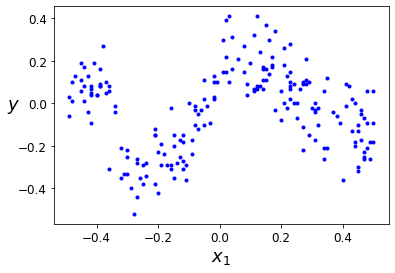

In [25]:
plt.plot(t, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

In [26]:
T_b = np.c_[np.ones((200, 1)), t]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(T_b.T.dot(T_b)).dot(T_b.T).dot(y)

In [27]:
theta_best

array([-0.03047401,  0.04986348])

In [28]:
T_new = np.array([[0], [2]])
T_new_b = np.c_[np.ones((2, 1)), T_new]  # add x0 = 1 to each instance
y_predict = T_new_b.dot(theta_best)
y_predict

array([-0.03047401,  0.06925295])

In [29]:
T_new

array([[0],
       [2]])

In [30]:
y_predict

array([-0.03047401,  0.06925295])

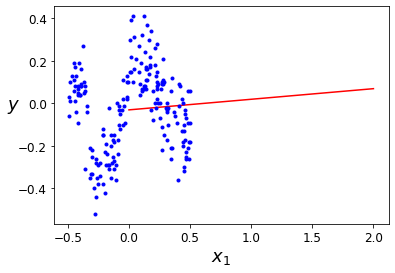

In [31]:
plt.plot(T_new, y_predict, "r-") #r- make the line red
plt.plot(t, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

#what just happened? why do i have negative numbers? 

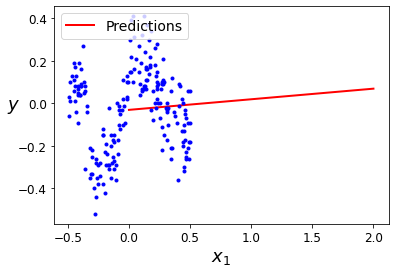

In [32]:
plt.plot(T_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(t, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()

#it looks weird.... 

In [33]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(t, y)
lin_reg.intercept_, lin_reg.coef_

(-0.030474011965049067, array([0.04986348]))

In [34]:
lin_reg.predict(t_new)

array([332.35949699])

In [35]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(T_b, y, rcond=1e-6)
theta_best_svd

array([-0.03047401,  0.04986348])

In [36]:
np.linalg.pinv(T_b).dot(y)

array([-0.03047401,  0.04986348])